<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/chapter_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an image classifier using the Sequential API 
Here, we will make an image classifier using keras' Sequential API. The image classifier would be made for the Fashion MNIST dataset which has 70,000 grayscales of different fashion items having size 28 x 28.

In [1]:
# Importing libraries 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [2]:
# Loading the Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist # Utility function for loading 
                                             # common dataset 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
                                            # Splitting data into train and test

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Shapes and datatype of dataset 
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# Dividing the full training dataset to a train and valid set with scaling 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
                  # Dividing by 255 to scale the input 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# Making labels list 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]] # Class of y_train[0]

'Coat'

In [6]:
# Making the neural network using Sequential API 
model = keras.models.Sequential() # Initialising the model 
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # Output layer

In [7]:
# Summary of the model showing layers, types, trainable and non-trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the model 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [9]:
# Training and evaluating the model 
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9949 - accuracy: 0.6850 - val_loss: 0.5691 - val_accuracy: 0.7818
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5045 - accuracy: 0.8250 - val_loss: 0.4696 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4429 - accuracy: 0.8470 - val_loss: 0.4194 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4186 - accuracy: 0.8526 - val_loss: 0.4015 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3901 - accuracy: 0.8629 - val_loss: 0.4119 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8649 - val_loss: 0.3617 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8710 - val_loss: 0.3853 - val_accuracy:

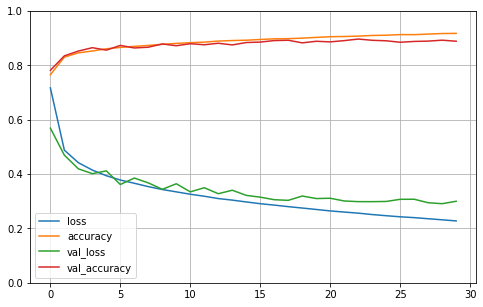

In [10]:
# Plotting the parameters of the trained model 

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe of the history object 
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range from 0-1
plt.show()

In [11]:
# Evaluating the model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.1143 - accuracy: 0.8359


[70.1142807006836, 0.8359000086784363]

The model has performed with an accuracy of 86% on the test set, which shows that the model is able to generalise easily.

In [12]:
# Predicting on data using the model 

# Importing numpy 
import numpy as np

print(model.predict(X_test[:3]))
y_pred = model.predict_classes(X_test[:3])
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle Boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Building a Regression model using the Sequential API
Here, we will make a regression model on the California housing problem using a neural network. This is a simpler dataset as it has only numerical values in stored in columns.

In [14]:
# Importing dataset from Scikit-Learn
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset using utility function 
housing = fetch_california_housing()

# Splitting the data into train, test and valid sets 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data
                                                              , housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Initialising scaler to scale the data 
scaler = StandardScaler() 

# Scaling the data 
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 132112961532622176256.0000 - val_loss: 3838076783949774848.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 864521687983525376.0000 - val_loss: 1637739790336.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 368898640614.6813 - val_loss: 698824.1875
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 157405.4046 - val_loss: 1.5665
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3724 - val_loss: 1.2945
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3434 - val_loss: 1.2946
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3283 - val_loss: 1.2950
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3685 - val_loss: 1.2945
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3585 - val_loss: 1.2949
Epoch 10/20
